In [1]:
%matplotlib inline

## Define cosmic time array

In [2]:
from diffmah.sigmoid_mah import logmpeak_from_logt
from astropy.cosmology import Planck15
zarr = np.linspace(10, 0, 1000)
tarr = Planck15.age(zarr).value
logt = np.log10(tarr)
logt0 = Planck15.age(0).value


### For Milky Way halos, compute early-, median-, and late-forming histories

In [3]:
from diffmah.sigmoid_mah import logmpeak_from_logt, _median_mah_sigmoid_params

logmpeak_at_logt0 = 12
logtc_med, logtk_med, dlogm_height_med = _median_mah_sigmoid_params(logmpeak_at_logt0)

#  early
logmah12_early = logmpeak_from_logt(
    logt,
    logtc_med-0.25,
    logtk_med,
    dlogm_height_med,
    logmpeak_at_logt0,
    logt0,
)

# median
logmah12_med = logmpeak_from_logt(
    logt,
    logtc_med,
    logtk_med,
    dlogm_height_med,
    logmpeak_at_logt0,
    logt0,
)
logmah12_late = logmpeak_from_logt(
    logt,
    logtc_med+0.25,
    logtk_med,
    dlogm_height_med,
    logmpeak_at_logt0,
    logt0,
)

/Users/aphearin/miniconda3/envs/dchop/lib/python3.7/site-packages/jax/lib/xla_bridge.py:120: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


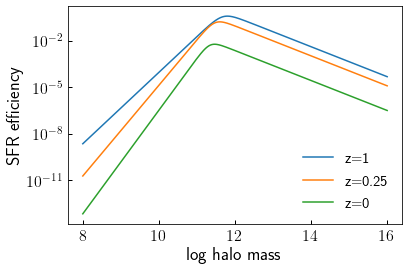

In [4]:
from moster17_efficiency import sfr_efficiency_function

lgm = np.linspace(8, 16, 1000)

fig, ax = plt.subplots(1, 1)
yscale = ax.set_yscale('log')
__=ax.plot(lgm, sfr_efficiency_function(10**lgm, 1), label='z=1')
__=ax.plot(lgm, sfr_efficiency_function(10**lgm, 0.25), label='z=0.25')
__=ax.plot(lgm, sfr_efficiency_function(10**lgm, 0), label='z=0')
leg = ax.legend()
xlabel = ax.set_xlabel('log halo mass')
ylabel = ax.set_ylabel('SFR efficiency')


### Now compute in-situ stellar mass

In [5]:
from scipy.integrate import trapz

fb = 0.156

def get_moster17_mstar_z0(logm0):
    logtc, logtk, dlogm_height = _median_mah_sigmoid_params(logm0)
    logmah = logmpeak_from_logt(logt, logtc, logtk, dlogm_height, logm0, logt0)
    mah = 10**logmah
    dmhdt = np.diff(mah)/np.diff(tarr)
    dydx = sfr_efficiency_function(mah[1:], zarr[1:])*dmhdt*fb
    mstar = trapz(dydx, x=tarr[1:])
    return mstar


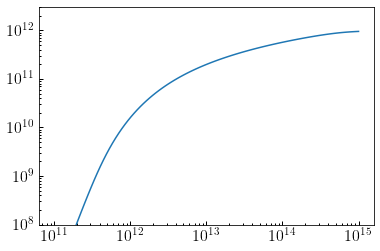

In [6]:
lgmarr = np.linspace(11, 15, 100)
smarr = [get_moster17_mstar_z0(lgm) for lgm in lgmarr]
fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(1e8, 3e12)
__=ax.loglog()
__=ax.plot(10**lgmarr, smarr)

In [7]:
pwd

'/Users/aphearin/work/random/0227/moster_sfh/moster_sfh'